### Apache kafka Using PySpark Codeume

In [2]:
from pyspark.sql import SparkSession

In [11]:
# Initialize Spark Session
spark = (SparkSession.builder
    .appName("pysparkKafkaApp")
    .config("spark.streaming.stopGracefullyOnShutdown", True)
    .config('spark.jars.packages', 'org.apache.spark:spark-sql-kafka-0-10_2.12:3.5.0')
    .getOrCreate())

print("Spark Version:", spark.version)

Spark Version: 3.5.0


### Sending data from pyspark code to console of kafka

In [12]:
# Sample Data
data = spark.createDataFrame([
    (1, "Sending message to Kafka"),
    (2, "Sending message to Kafka again"),
    (3, "Message sent to Kafka")
], ["Id", "Message"])

print(data.show())

# Convert to JSON format (Kafka requires key-value messages)
data_json = data.selectExpr("CAST(Id AS STRING) AS key", "to_json(struct(*)) AS value")


+---+--------------------+
| Id|             Message|
+---+--------------------+
|  1|Sending message t...|
|  2|Sending message t...|
|  3|Message sent to K...|
+---+--------------------+

None


In [ ]:
# Write static DataFrame to Kafka console
(data_json.write
    .format("kafka")
    .option("kafka.bootstrap.servers", "broker:9092")
    .option("checkpointLocation", "/tmp/spark/checkpoint")
    .option("topic", "kafka-topic")
    .save())

print("Static DataFrame successfully sent to Kafka console!")

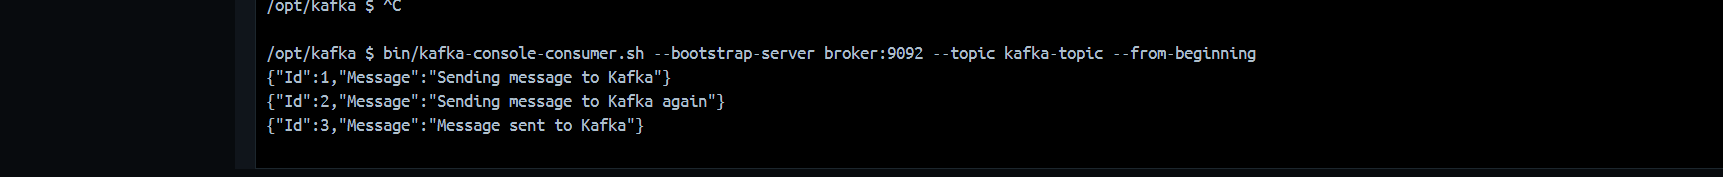

### How you can send data from kafka producer in console and grab it in the pyspark:
use this to send data:
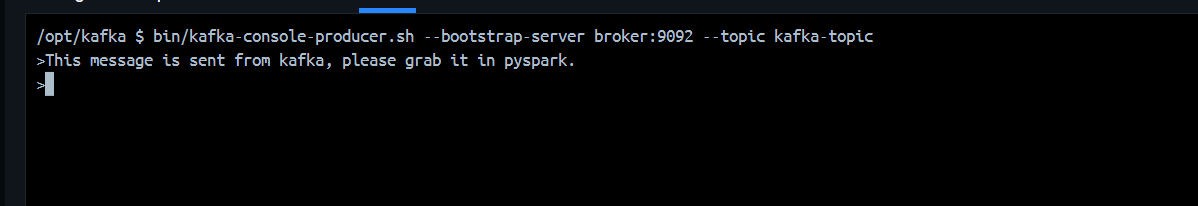

In [8]:
kafka_df = (spark
    .readStream 
    .format("kafka") 
    .option("kafka.bootstrap.servers", "broker:9092") 
    .option("subscribe", "kafka-topic") 
    .option("failOnDataLoss", "false") 
    .load())

kafka_df = kafka_df.selectExpr("CAST(value AS STRING) as message")

def foreach_batch_function(df, epoch_id):
    print(df.show(truncate=False))

# Start streaming and display output
query = (kafka_df.writeStream 
    .outputMode("append") 
    .foreachBatch(foreach_batch_function) 
    .option("checkpointLocation", "checkpoint_dir_kafka") 
    .start())

query.awaitTermination(5)  

+-----------------------------------------------------------+
|message                                                    |
+-----------------------------------------------------------+
|This message is sent from kafka, please grab it in pyspark.|
+-----------------------------------------------------------+

None


False

+-----------------------------------+
|message                            |
+-----------------------------------+
|This is another message from aacict|
+-----------------------------------+

None


So, the combination of these consumer and producer can be used in applications which requires real time data consumption. For example, data can be sent from backend to frontend applications like the forex data, stock data etc.